# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Aimar Abimayu Pratama
- Email: aimarabimanyu123@gmail.com
- Id Dicoding: thekongkow

## Menentukan Pertanyaan Bisnis

- Pada hari kerja (workingday), pada jam berapa peminjaman sepeda paling banyak dan paling sedikit untuk pengguna casual dan registered?
- Pada hari libur (weekend + libur nasional), pada jam berapa peminjaman sepeda paling banyak dan paling sedikit untuk pengguna casual dan registered?
- Pada musim (season) apa peminjaman sepeda paling banyak dan paling sedikit?
- Seberapa pengaruh suhu (temp) terhadap jumlah peminjaman sepeda?
- Bagaimana tren peminjaman sepeda setiap bulan?
- Berapa total pengguna berdasarkan hasil clustering pada feeling temperature (atemp) dan humidity perhari?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

## Data Wrangling

### Gathering Data

In [2]:
# Load day table
day_df = pd.read_csv('data/day.csv')

day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
# Load hour table
hour_df = pd.read_csv('data/hour.csv')

hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

Assesing Day Table

In [4]:
# Check info seperti tipe data, jumlah kolom, jumlah data, dll
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Check missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Check duplicate rows
print("Duplicate rows: ", day_df.duplicated().sum())

Duplicate rows:  0


In [7]:
# Check statistik deskriptif
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Assessing Hour Table

In [8]:
# Check info seperti tipe data, jumlah kolom, jumlah data, dll
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Check missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Check duplicate rows
print("Duplicate rows: ", hour_df.duplicated().sum())

Duplicate rows:  0


In [11]:
# Check statistik deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


*Report from Data Assessment*
- Tidak ada missing value
- Tidak ada duplikasi data
- Kolom instant bisa dihapus karena tidak ada pengaruh terhadap analisis
- Beberapa nama kolom masih disingkat, menyulitkan pembacaan
- Kolom dteday bertipe object, seharusnya bertipe datetime
- Kolom season, mnth, holiday, weekday, workingday bertipe integer, seharusnya bertipe category
- Kolom yr terdiri dari 2 nilai yaitu 0 dan 1, seharusnya diganti masing2 nilainya menjadi 2011 dan 2012
- Kolom mnth berisi nilai 1 hingga 12, seharusnya mengganti masing2 nilainya menjadi nama bulan seperti january, february, march, dst
- Kolom season berisi nilai 1, 2, 3, dan 4, seharusnya mengganti masing2 nilainya menjadi musim seperti springer, summer, fall, dan winter
- Kolom holiday berisi nilai 0 dan 1, seharusnya diganti nilainya menjadi yes atau no mewakili hari libur nasional dan bukan hari libur nasional
- Kolom weekday berisi urutan nilai 0 hingga 6, seharusnya mengganti nilainya menjadi hari dimulai dari Sunday dan diakhiri Saturday
- Kolom workingday berisi nilai 0 dan 1, seharusnya diganti nilainya menjadi yes dan no dimana mewakili hari kerja dan bukan hari kerja
- Kolom weathersit berisi nilai 1, 2, 3, dan 4, seharusnya mengganti nilainya menjadi kondisi cuaca seperti masing2 clear, cloudy, light_rain_snow, dan heavy_rain_snow

### Cleaning Data

In [12]:
# Drop kolom instant pada day_df dan hour_df
day_df.drop(columns=['instant'], inplace=True)
hour_df.drop(columns=['instant'], inplace=True)

In [13]:
# Rename beberapa columns pada day_df
day_df.rename(columns={'dteday': 'date',
                       'yr': 'year',
                       'mnth': 'month',
                       'holiday': 'is_holiday',
                       'weekday': 'day_of_week',
                       'workingday': 'is_workingday',
                       'hum': 'humidity',
                       'casual': 'casual_user',
                       'registered': 'registered_user',
                       'cnt': 'total_user'}, inplace=True)

day_df

,date,season,year,month,is_holiday,day_of_week,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual_user,registered_user,total_user
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [14]:
# Rename beberapa columns pada hour_df
hour_df.rename(columns={'dteday': 'date',
                        'yr': 'year',
                        'mnth': 'month',
                        'hr': 'hour',
                        'holiday': 'is_holiday',
                        'weekday': 'day_of_week',
                        'workingday': 'is_workingday',
                        'hum': 'humidity',
                        'casual': 'casual_user',
                        'registered': 'registered_user',
                        'cnt': 'total_user'}, inplace=True)

hour_df

,date,season,year,month,hour,is_holiday,day_of_week,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual_user,registered_user,total_user
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [15]:
# Mengubah tipe data pada day_df dan hour_df kolom date menjadi datetime
day_df['date'] = pd.to_datetime(day_df['date'])
hour_df['date'] = pd.to_datetime(hour_df['date'])

In [16]:
# Mengubah tipe data pada day_df dan hour_df kolom season, month, is_holiday, day_of_week, is_workingday dan weathersit menjadi category
columns = ['season', 'month', 'is_holiday', 'day_of_week', 'is_workingday']

for column in columns:
    day_df[column] = day_df[column].astype('category')
    hour_df[column] = hour_df[column].astype('category')

In [17]:
# Mengubah nilai pada day_df dan hour_df kolom year menjadi nilai yang sesuai
day_df['year'] = day_df['year'].replace({0: 2011, 1: 2012})
hour_df['year'] = hour_df['year'].replace({0: 2011, 1: 2012})

In [18]:
# Mengubah nilai pada kolom month menjadi nama bulan
day_df['month'] = day_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                                           7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov',
                                           12: 'Dec'})
hour_df['month'] = hour_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                                           7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov',
                                           12: 'Dec'})

In [19]:
# Mengubah nilai pada kolom season menjadi nilai yang sebenarnya
day_df['season'] = day_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
hour_df['season'] = hour_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [20]:
# Mengubah nilai pada kolom is_holiday menjadi nilai yang sebenarnya
day_df['is_holiday'] = day_df['is_holiday'].replace({0: 'no', 1: 'yes'})
hour_df['is_holiday'] = hour_df['is_holiday'].replace({0: 'no', 1: 'yes'})

In [21]:
# Mengubah nilai pada kolom day_of_week menjadi nilai yang sebenarnya
day_df['day_of_week'] = day_df['day_of_week'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                                                       4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hour_df['day_of_week'] = hour_df['day_of_week'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                                                         4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

In [22]:
# Mengubah nilai pada kolom is_workingday menjadi nilai yang sebenarnya
day_df['is_workingday'] = day_df['is_workingday'].replace({0: 'no', 1: 'yes'})
hour_df['is_workingday'] = hour_df['is_workingday'].replace({0: 'no', 1: 'yes'})

In [23]:
# Mengubah nilai pada kolom weathersit menjadi nilai yang sebenarnya
day_df['weathersit'] = day_df['weathersit'].replace({1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'})
hour_df['weathersit'] = hour_df['weathersit'].replace({1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'})

In [24]:
# Lihat kembali isi dari day_df
day_df

,date,season,year,month,is_holiday,day_of_week,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual_user,registered_user,total_user
0,2011-01-01,spring,2011,Jan,no,Saturday,no,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,spring,2011,Jan,no,Sunday,no,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,spring,2011,Jan,no,Monday,yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,spring,2011,Jan,no,Tuesday,yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,spring,2011,Jan,no,Wednesday,yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,spring,2012,Dec,no,Thursday,yes,cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,spring,2012,Dec,no,Friday,yes,cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,spring,2012,Dec,no,Saturday,no,cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,spring,2012,Dec,no,Sunday,no,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [25]:
# Lihat kembali isi dari hour_df
hour_df

,date,season,year,month,hour,is_holiday,day_of_week,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual_user,registered_user,total_user
0,2011-01-01,spring,2011,Jan,0,no,Saturday,no,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,spring,2011,Jan,1,no,Saturday,no,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,spring,2011,Jan,2,no,Saturday,no,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,spring,2011,Jan,3,no,Saturday,no,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,spring,2011,Jan,4,no,Saturday,no,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,spring,2012,Dec,19,no,Monday,yes,cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,spring,2012,Dec,20,no,Monday,yes,cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,spring,2012,Dec,21,no,Monday,yes,clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,spring,2012,Dec,22,no,Monday,yes,clear,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df

In [26]:
# Melihat isi dari day_df
day_df

,date,season,year,month,is_holiday,day_of_week,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual_user,registered_user,total_user
0,2011-01-01,spring,2011,Jan,no,Saturday,no,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,spring,2011,Jan,no,Sunday,no,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,spring,2011,Jan,no,Monday,yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,spring,2011,Jan,no,Tuesday,yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,spring,2011,Jan,no,Wednesday,yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,spring,2012,Dec,no,Thursday,yes,cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,spring,2012,Dec,no,Friday,yes,cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,spring,2012,Dec,no,Saturday,no,cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,spring,2012,Dec,no,Sunday,no,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [27]:
# Melihat statistik deskriptif dari semua kolom di day_df
day_df.describe(include='all')

,date,season,year,month,is_holiday,day_of_week,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual_user,registered_user,total_user
count,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,NaN,Jan,no,Sunday,yes,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [28]:
# Melihat total peminjaman perbulan dari tahun 2011 hingga 2012
day_df.groupby(['year', 'month']).agg({
    'total_user': 'sum'
})

total_user
year month            
2011 Jan         38189
     Feb         48215
     Mar         64045
     Apr         94870
     May        135821
     Jun        143512
     Jul        141341
     Aug        136691
     Sep        127418
     Oct        123511
     Nov        102167
     Dec         87323
2012 Jan         96744
     Feb        103137
     Mar        164875
     Apr        174224
     May        195865
     Jun        202830
     Jul        203607
     Aug        214503
     Sep        218573
     Oct        198841
     Nov        152664
     Dec        123713

In [29]:
# Melihat peminjaman perbulan dari tahun 2011 hingga 2012 berdasarkan tipe pengguna
day_df.groupby(['year', 'month']).agg({
    'casual_user': 'sum',
    'registered_user': 'sum'
})

casual_user  registered_user
year month                              
2011 Jan           3073            35116
     Feb           6242            41973
     Mar          12826            51219
     Apr          22346            72524
     May          31050           104771
     Jun          30612           112900
     Jul          36452           104889
     Aug          28842           107849
     Sep          26545           100873
     Oct          25222            98289
     Nov          15594            86573
     Dec           8448            78875
2012 Jan           8969            87775
     Feb           8721            94416
     Mar          31618           133257
     Apr          38456           135768
     May          44235           151630
     Jun          43294           159536
     Jul          41705           161902
     Aug          43197           171306
     Sep          43778           174795
     Oct          34538           164303
     Nov          21009           131655
     Dec          13245           110468

In [30]:
# Melihat total peminjaman permusim dari tahun 2011 hingga 2012
day_df.groupby(['year', 'season']).agg({
    'total_user': 'sum'
})

total_user
year season            
2011 spring      150000
     summer      347316
     fall        419650
     winter      326137
2012 spring      321348
     summer      571273
     fall        641479
     winter      515476

In [31]:
# Melihat total peminjaman berdasarkan cuaca dari tahun 2011 hingga 2012
day_df.groupby(['year', 'weathersit']).agg({
    'total_user': 'sum'
})

total_user
year weathersit                 
2011 clear                835067
     cloudy               382924
     light_rain_snow       25112
2012 clear               1422885
     cloudy               613934
     light_rain_snow       12757

In [32]:
# Melihat total peminjaman berdasarkan hari kerja dan hari libur dari tahun 2011 hingga 2012
day_df.groupby(['year', 'is_workingday']).agg({
    'total_user': 'sum'
})

total_user
year is_workingday            
2011 no                 386839
     yes                856264
2012 no                 613430
     yes               1436146

### Eksplorasi Data hour_df

In [33]:
# Melihat isi dari hour_df
hour_df

,date,season,year,month,hour,is_holiday,day_of_week,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual_user,registered_user,total_user
0,2011-01-01,spring,2011,Jan,0,no,Saturday,no,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,spring,2011,Jan,1,no,Saturday,no,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,spring,2011,Jan,2,no,Saturday,no,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,spring,2011,Jan,3,no,Saturday,no,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,spring,2011,Jan,4,no,Saturday,no,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,spring,2012,Dec,19,no,Monday,yes,cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,spring,2012,Dec,20,no,Monday,yes,cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,spring,2012,Dec,21,no,Monday,yes,clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,spring,2012,Dec,22,no,Monday,yes,clear,0.26,0.2727,0.56,0.1343,13,48,61


In [34]:
# Melihat statistik deskriptif dari semua kolom di hour_df
hour_df.describe(include='all')

,date,season,year,month,hour,is_holiday,day_of_week,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual_user,registered_user,total_user
count,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,NaN,May,NaN,no,Saturday,yes,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [35]:
# Melihat total peminjaman perjam dari tahun 2011 hingga 2012
hour_df.groupby(['year', 'hour']).agg({
    'total_user': 'sum'
})

total_user
year hour            
2011 0          15540
     1           9558
     2           6661
     3           3441
     4           1817
     5           5157
     6          20801
     7          56930
     8          95467
     9          59486
     10         47511
     11         56598
     12         69198
     13         69339
     14         66482
     15         68590
     16         85622
     17        127632
     18        116985
     19         85802
     20         62818
     21         48875
     22         37677
     23         25116
2012 0          23590
     1          14606
     2           9691
     3           4733
     4           2611
     5           9104
     6          34331
     7          97241
     8         165534
     9          99952
     10         78746
     11         94722
     12        115216
     13        115580
     14        109170
     15        114559
     16        142126
     17        209228
     18        192787
     19        140987
     20        101732
     21         76570
     22         57935
     23         38825

### Check Correlation

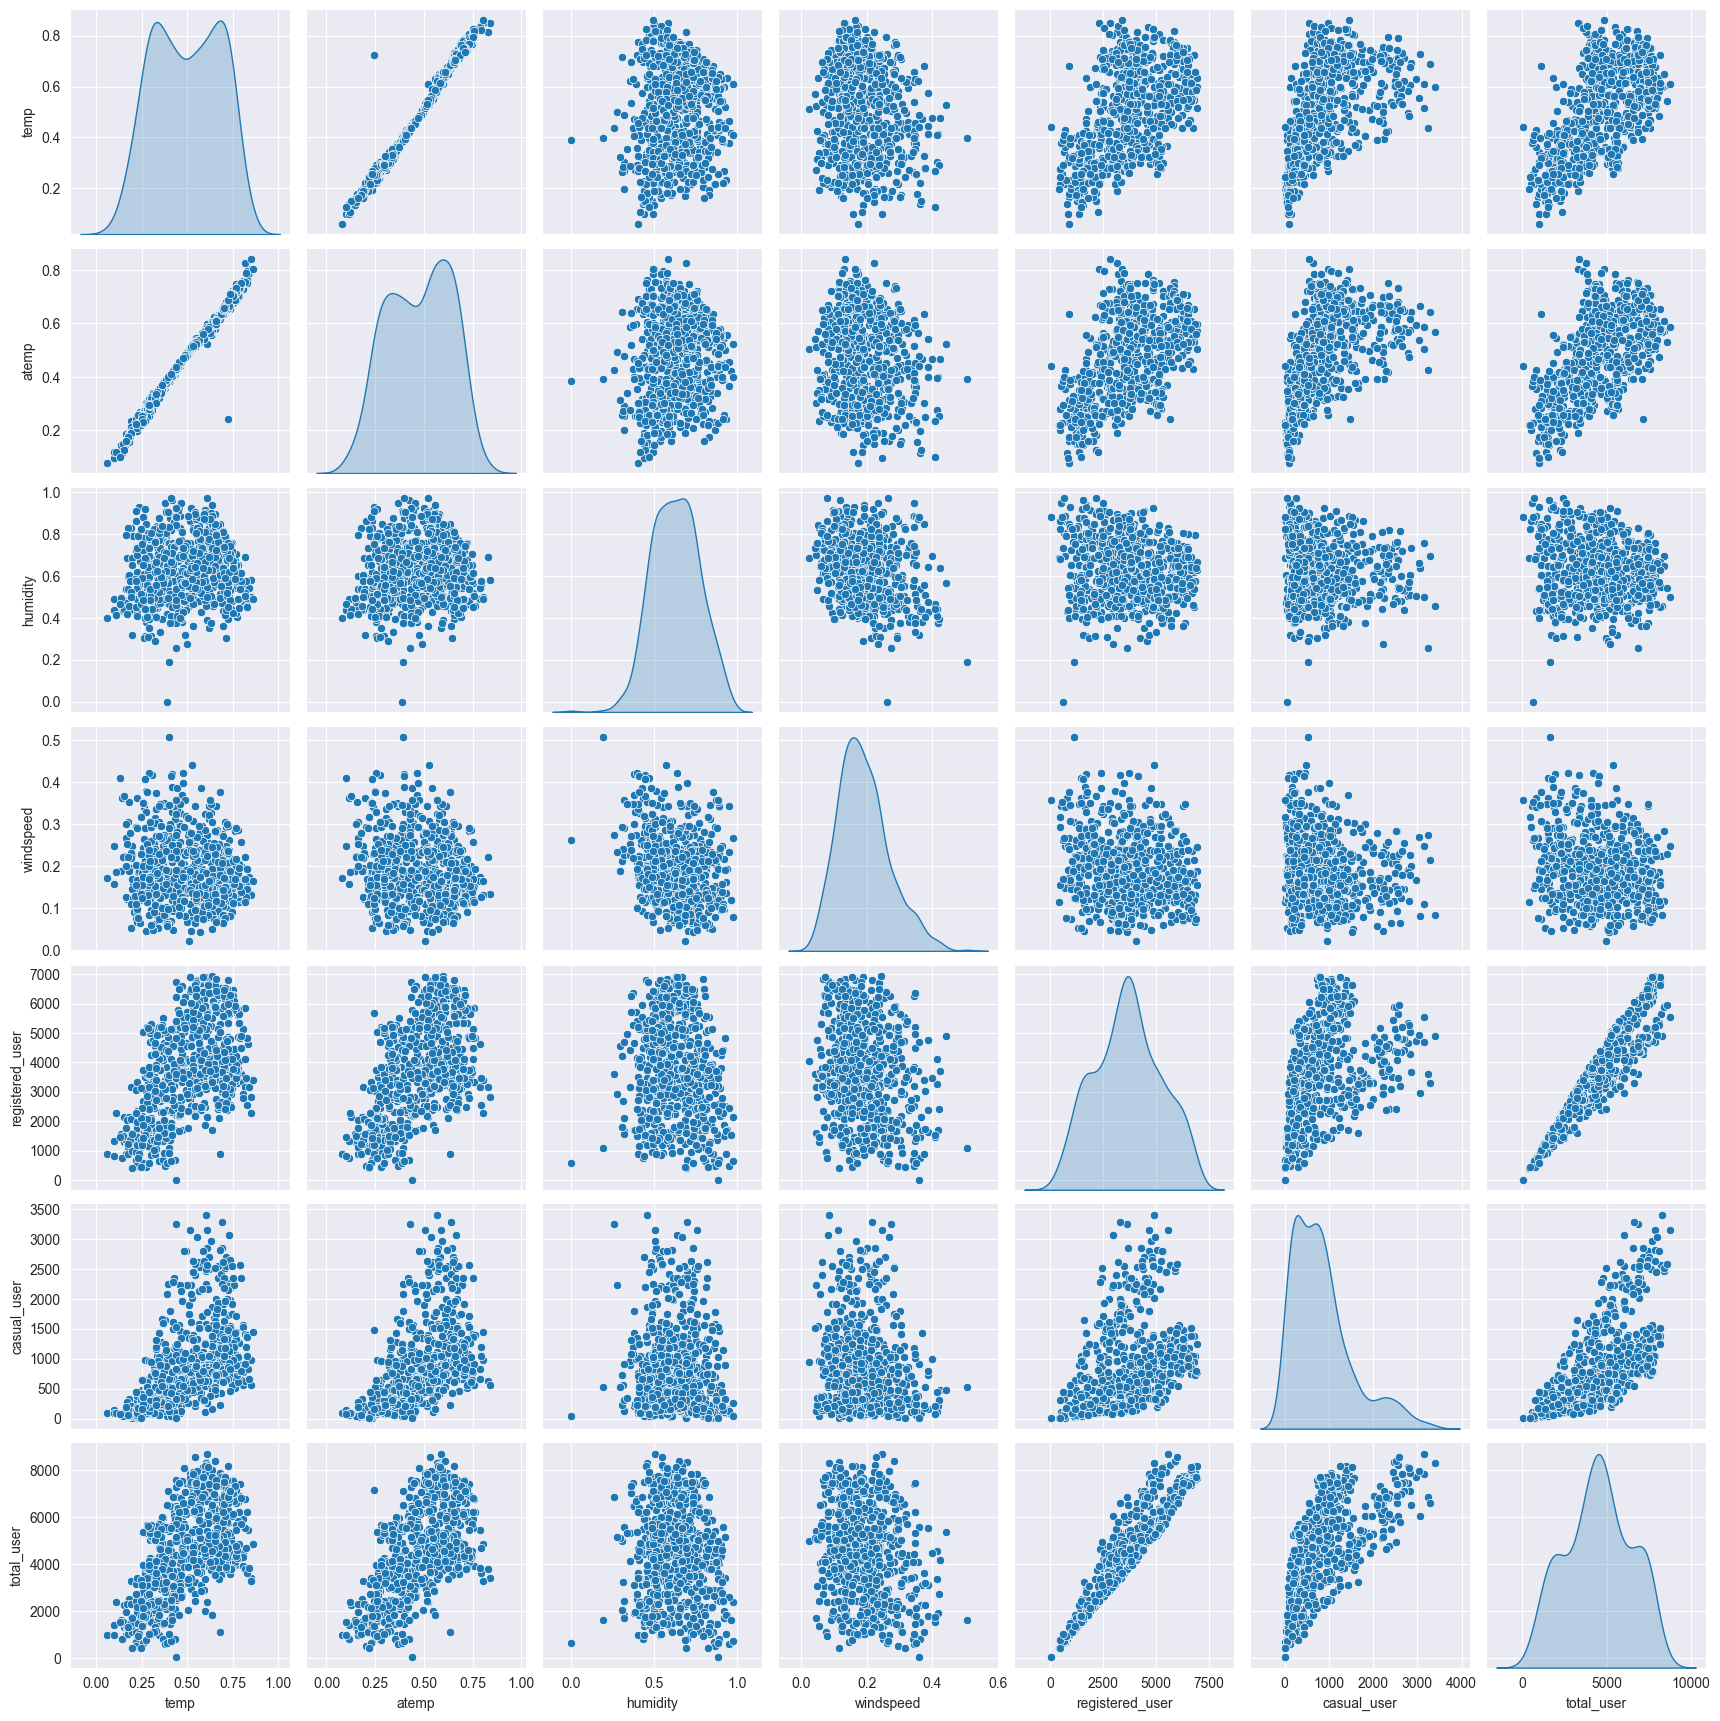

In [36]:
# Melihat korelasi antar kolom numerik di day_df menggunakan pairplot
sns.pairplot(day_df[['temp', 'atemp', 'humidity', 'windspeed', 'registered_user', 'casual_user', 'total_user']], diag_kind='kde')

Text(0.5, 1.0, 'Correlation Matrix')

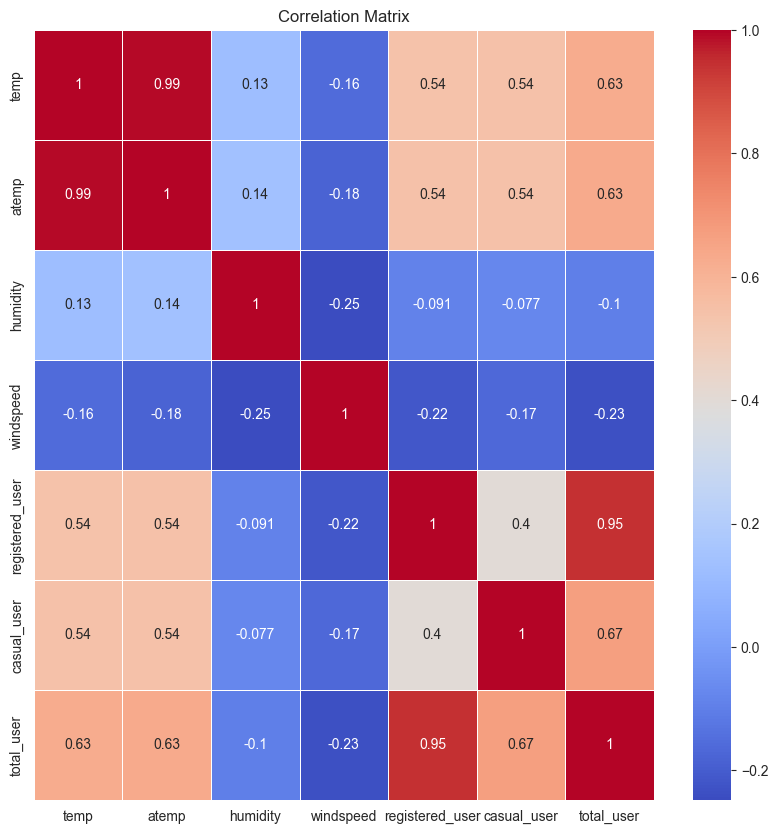

In [37]:
# Melihat korelasi antar kolom numerik di day_df menggunakan heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(day_df[['temp', 'atemp', 'humidity', 'windspeed', 'registered_user', 'casual_user', 'total_user']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

### Clustering

In [38]:
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)

# Menentukan feature yang akan digunakan
X = day_df[['atemp', 'humidity']]

# Melakukan clustering
day_df_atemp_hum_class = kmeans.fit_predict(X)

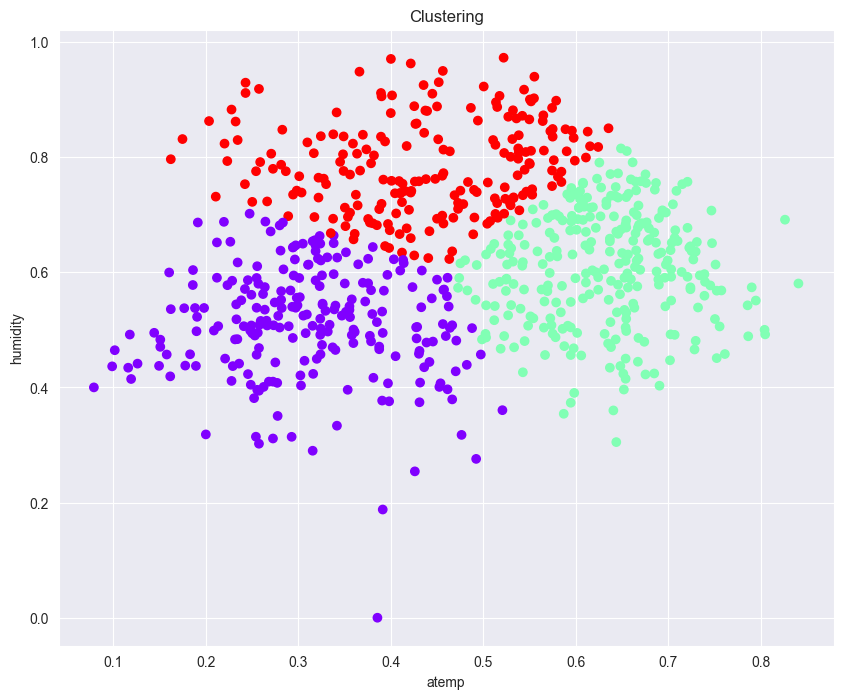

In [39]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
plt.scatter(X['atemp'], X['humidity'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('atemp')
plt.ylabel('humidity')
plt.title('Clustering')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari kerja, pada jam berapa peminjaman sepeda paling banyak dan paling sedikit untuk pengguna casual dan registered?

In [40]:
# Membuat dataframe baru yang berisi data day_df pada hari kerja
hour_df_workday = hour_df[hour_df['is_workingday'] == 'yes']

hour_df_workday

,date,season,year,month,hour,is_holiday,day_of_week,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual_user,registered_user,total_user
47,2011-01-03,spring,2011,Jan,0,no,Monday,yes,clear,0.22,0.1970,0.44,0.3582,0,5,5
48,2011-01-03,spring,2011,Jan,1,no,Monday,yes,clear,0.20,0.1667,0.44,0.4179,0,2,2
49,2011-01-03,spring,2011,Jan,4,no,Monday,yes,clear,0.16,0.1364,0.47,0.3881,0,1,1
50,2011-01-03,spring,2011,Jan,5,no,Monday,yes,clear,0.16,0.1364,0.47,0.2836,0,3,3
51,2011-01-03,spring,2011,Jan,6,no,Monday,yes,clear,0.14,0.1061,0.50,0.3881,0,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,spring,2012,Dec,19,no,Monday,yes,cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,spring,2012,Dec,20,no,Monday,yes,cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,spring,2012,Dec,21,no,Monday,yes,clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,spring,2012,Dec,22,no,Monday,yes,clear,0.26,0.2727,0.56,0.1343,13,48,61


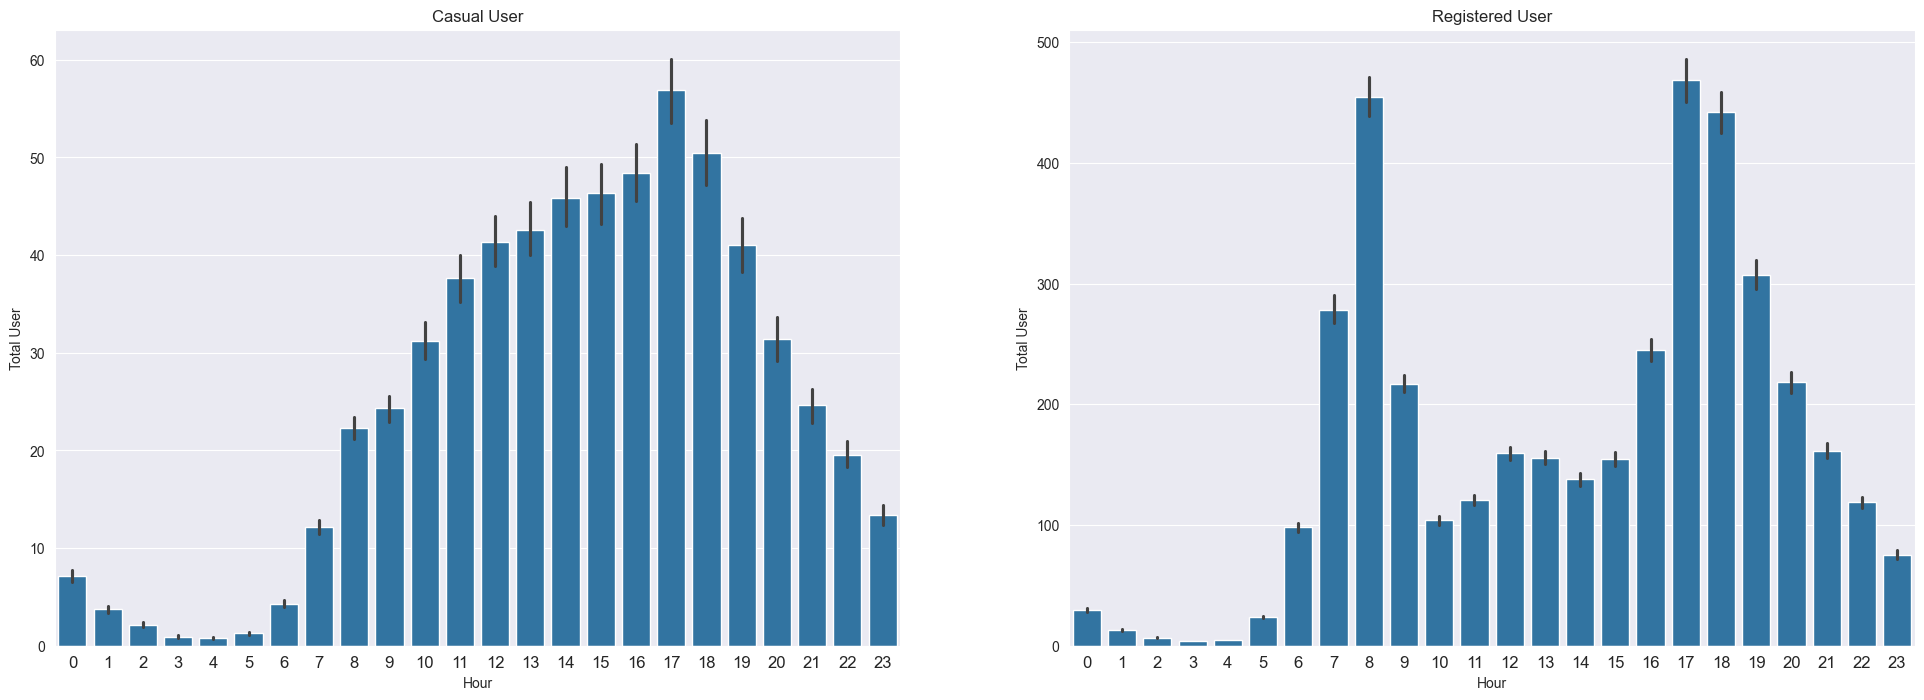

In [41]:
# Membuat visualisasi untuk melihat peminjaman sepeda pada hari kerja berdasarkan jam untuk pengguna casual dan registered
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

sns.barplot(x='hour', y='casual_user', data=hour_df_workday, ax=ax[0])
ax[0].set_title('Casual User')
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Total User')
ax[0].tick_params(axis='x', labelsize=12)

sns.barplot(x='hour', y='registered_user', data=hour_df_workday, ax=ax[1])
ax[1].set_title('Registered User')
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Total User')
ax[1].tick_params(axis='x', labelsize=12)

### Pertanyaan 2: Pada hari libur (weekend + libur nasional), pada jam berapa peminjaman sepeda paling banyak dan paling sedikit untuk pengguna casual dan registered?

In [42]:
# Membuat dataframe baru yang berisi data day_df pada hari libur
hour_df_holiday = hour_df[hour_df['is_workingday'] == 'no']

hour_df_holiday

,date,season,year,month,hour,is_holiday,day_of_week,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual_user,registered_user,total_user
0,2011-01-01,spring,2011,Jan,0,no,Saturday,no,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,spring,2011,Jan,1,no,Saturday,no,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,spring,2011,Jan,2,no,Saturday,no,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,spring,2011,Jan,3,no,Saturday,no,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,spring,2011,Jan,4,no,Saturday,no,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17350,2012-12-30,spring,2012,Dec,19,no,Sunday,no,clear,0.34,0.3636,0.61,0.0000,16,86,102
17351,2012-12-30,spring,2012,Dec,20,no,Sunday,no,clear,0.22,0.1970,0.47,0.3284,9,63,72
17352,2012-12-30,spring,2012,Dec,21,no,Sunday,no,clear,0.20,0.2121,0.51,0.1642,5,42,47
17353,2012-12-30,spring,2012,Dec,22,no,Sunday,no,clear,0.20,0.1970,0.55,0.1940,6,30,36


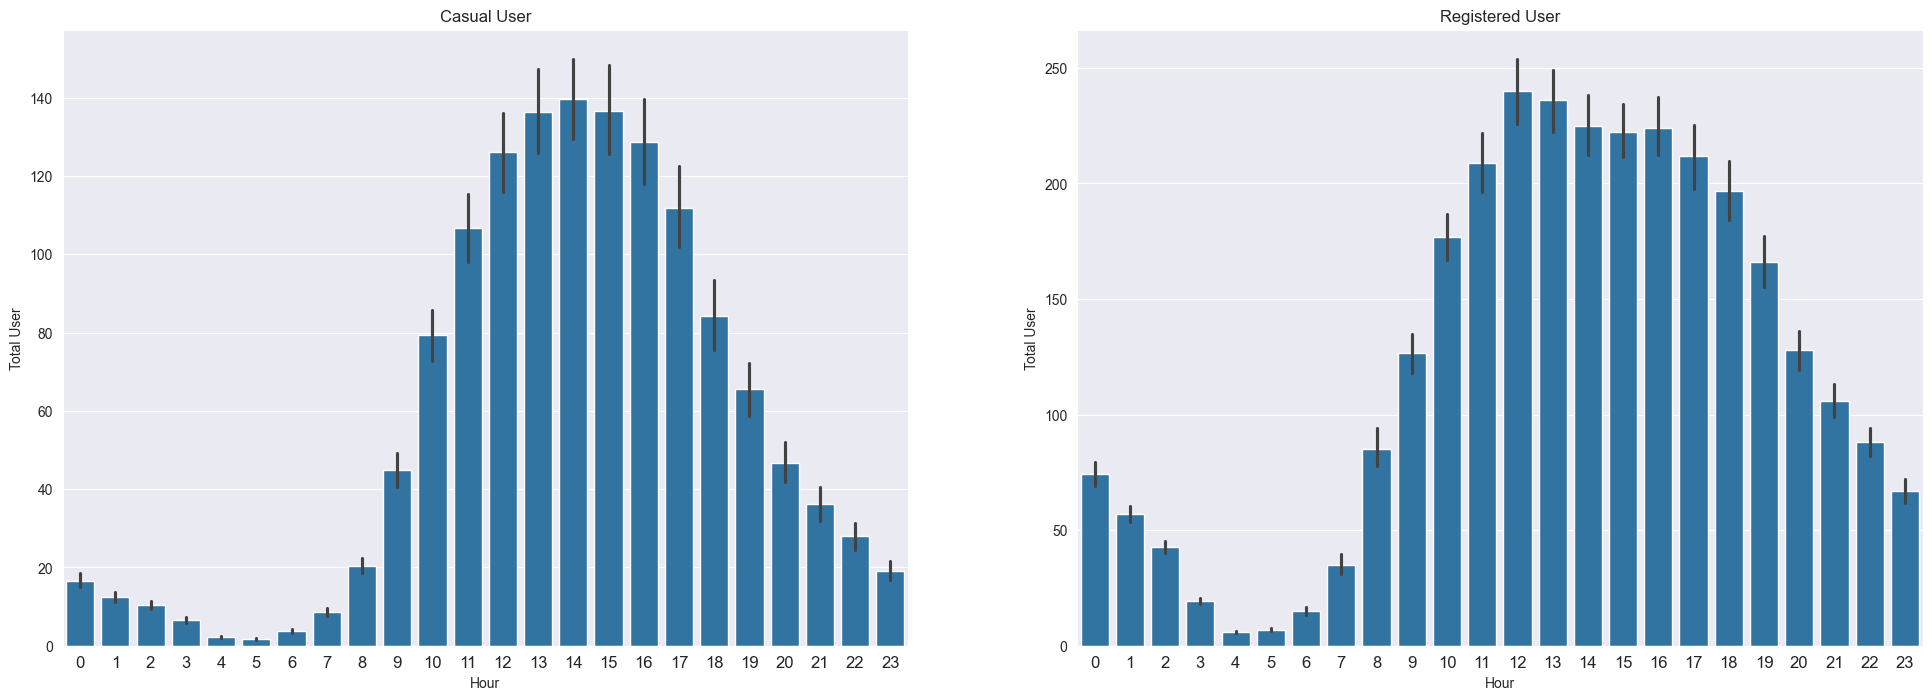

In [43]:
# Membuat visualisasi untuk melihat peminjaman sepeda pada hari kerja berdasarkan jam untuk pengguna casual dan registered
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

sns.barplot(x='hour', y='casual_user', data=hour_df_holiday, ax=ax[0])
ax[0].set_title('Casual User')
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Total User')
ax[0].tick_params(axis='x', labelsize=12)

sns.barplot(x='hour', y='registered_user', data=hour_df_holiday, ax=ax[1])
ax[1].set_title('Registered User')
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Total User')
ax[1].tick_params(axis='x', labelsize=12)

### Pertanyaan 3: Pada musim (season) apa peminjaman sepeda paling banyak dan paling sedikit?

In [44]:
# Membuat dataframe baru yang berisi total user pada data day_df berdasarkan season
season_df = day_df.groupby(['season']).agg({
    'total_user': 'sum'
}).sort_values(by='total_user', ascending=False).reset_index()

In [45]:
season_df

,season,total_user
0,fall,1061129
1,summer,918589
2,winter,841613
3,spring,471348


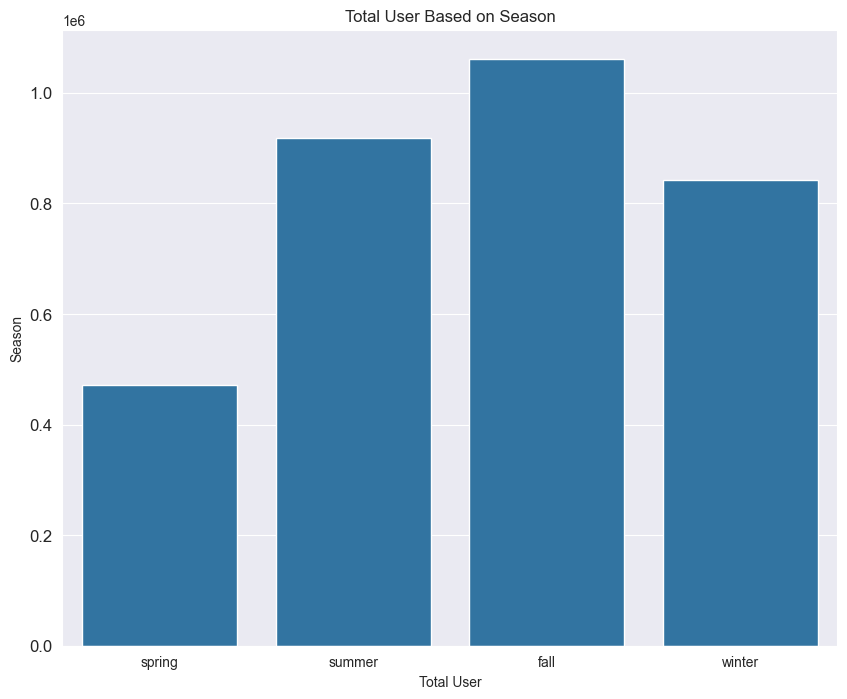

In [46]:
# Membuat visualisasi untuk melihat peminjaman sepeda berdasarkan musim untuk total user
plt.figure(figsize=(10, 8))
sns.barplot(x='season', y='total_user', data=season_df)
plt.title('Total User Based on Season')
plt.ylabel('Season')
plt.xlabel('Total User')
plt.tick_params(axis='y', labelsize=12)

### Pertanyaan 4: Seberapa pengaruh suhu (temp) terhadap jumlah peminjaman sepeda?

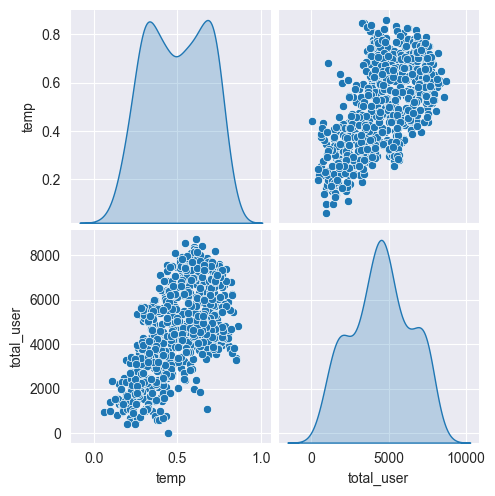

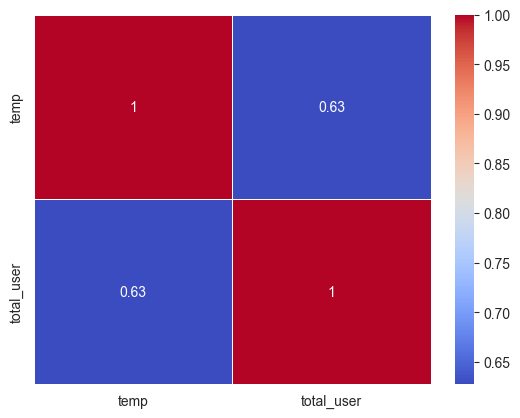

In [47]:
# Membuat visualisasi korelasi antara cuaca dan total user menggunakan pairplot dan heatmap
sns.pairplot(day_df[['temp', 'total_user']], diag_kind='kde')
plt.show()

sns.heatmap(day_df[['temp', 'total_user']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

### Pertanyaan 5: Bagaimana tren peminjaman sepeda setiap bulan?

In [48]:
# Membuat dataframe baru yang berisi data day_df perbulan pada tahun 2011 dan 2012
year_month_df = day_df.groupby(['year', 'month']).agg({
    'total_user': 'sum'
}).reset_index()

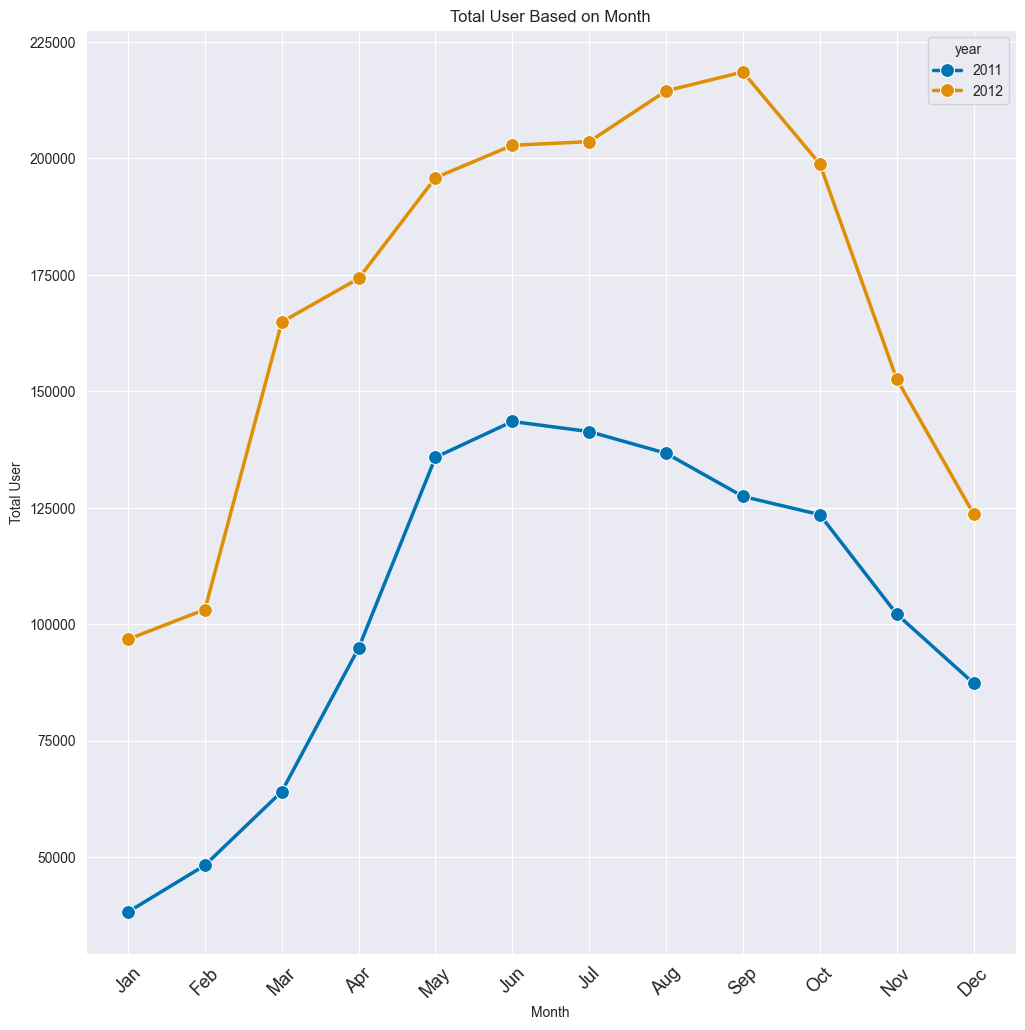

In [49]:
# Membuat visualisasi untuk melihat tren peminjaman sepeda setiap bulannya
plt.figure(figsize=(12, 12))
sns.lineplot(x='month', y='total_user', hue='year', data=year_month_df, marker='o', markersize=10, linewidth=2.5, palette='colorblind')
plt.title('Total User Based on Month')
plt.ylabel('Total User')
plt.xlabel('Month')
plt.tick_params(axis='x', labelsize=13, labelrotation=45)

### Pertanyaan 6: Berapa total pengguna berdasarkan hasil clustering pada feeling temperature (atemp) dan humidity perhari?

In [50]:
# Buat dataframe baru yang berisi atemp, humidity, total user, dan hasil clustering
day_cluster_df = day_df[['atemp', 'humidity', 'total_user']]
day_cluster_df['cluster'] = day_df_atemp_hum_class

# Melihat isi dari day_cluster_df
day_cluster_df

,atemp,humidity,total_user,cluster
0,0.363625,0.805833,985,2
1,0.353739,0.696087,801,2
2,0.189405,0.437273,1349,0
3,0.212122,0.590435,1562,0
4,0.229270,0.436957,1600,0
...,...,...,...,...
726,0.226642,0.652917,2114,0
727,0.255046,0.590000,3095,0
728,0.242400,0.752917,1341,2
729,0.231700,0.483333,1796,0


In [51]:
# Buat dataframe baru yang berisi total user berdasarkan hasil clustering
cluster_df = day_cluster_df.groupby(['cluster']).agg({
    'total_user': 'sum'
}).reset_index()

# Melihat isi dari cluster_df
cluster_df

,cluster,total_user
0,0,819023
1,1,1684599
2,2,789057


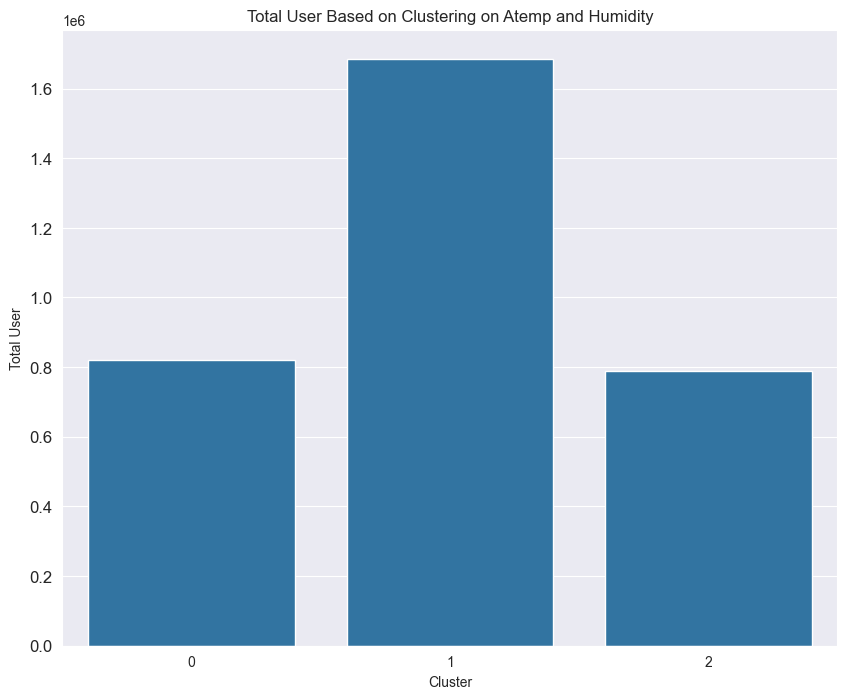

In [52]:
# Membuat visualisasi untuk melihat total pengguna berdasarkan hasil clustering
plt.figure(figsize=(10, 8))
colors = ["#72BCD4", "#72BCD4", "#72BCD4"]
sns.barplot(x='cluster', y='total_user', data=cluster_df)
plt.title('Total User Based on Clustering on Atemp and Humidity')
plt.ylabel('Total User')
plt.xlabel('Cluster')
plt.tick_params(axis='y', labelsize=12)

## Conclusion

- Pertanyaan 1: 
Pada hari kerja dari tahun 2011 dan 2012, didapat kalau peminjaman sepeda paling banyak dilakukan pada jam 17.00 dan paling sedikit dilakukan pada jam 4.00 untuk pengguna casual, sedangkan untuk pengguna registered paling banyak dilakukan pada jam 17.00 dan paling sedikit dilakukan pada jam 3.00. Terdapat perbedaan pada bentuk distribusi datanya dimana pengguna casual memiliki bentuk yang mirip distribusi normal sedangkan pengguna registered memiliki bentuk yang mirip distribusi bimodal.
- Pertanyaan 2: 
Pada hari libur dari tahun 2011 dan 2012, didapat kalau peminjaman sepeda paling banyak dilakukan pada jam 14.00 dan paling sedikit dilakukan pada jam 5.00 untuk pengguna casual, sedangkan untuk pengguna registered paling banyak dilakukan pada jam 12.00 dan paling sedikit dilakukan pada jam 4.00.
- Pertanyaan 3: 
Pada musim selama tahun 2011 dan 2012, didapat kalau peminjaman sepeda paling banyak dilakukan pada musim fall dan paling sedikit dilakukan pada musim spring.
- Pertanyaan 4: 
Suhu (temp) memiliki korelasi positif yang cukup kuat terhadap jumlah peminjaman sepeda (total_user) dengan nilai korelasi sebesar 0.63.
- Pertanyaan 5: 
Tren peminjaman sepeda setiap bulannya mengalami peningkatan dari bulan january hingga juni, kemudian mengalami penurunan dari hingga bulan desember untuk tahun 2011 dan untuk tahun 2012 mengalami peningkatan dari bulan january hingga bulan september, kemudian mengalami penurunan dari bulan oktober hingga bulan desember.
- Pertanyaan 6: 
Total pengguna berdasarkan hasil clustering pada feeling temperature (atemp) dan humidity perhari selama tahun 2011 dan tahun 2012 terbagi menjadi 3 cluster yaitu cluster 0, cluster 1, dan cluster 2. Cluster 0 memiliki total pengguna sebesar 789 ribu, cluster 1 memiliki total pengguna sebesar 1.68 juta, dan cluster 2 memiliki total pengguna sebesar 819 ribu.